## Project Goal
The goal of this exercise is to analyze a dataset consisting of information from 400 credit card holders and predict the average credit card balance of a given individual. Such an exercise could be conducted as part of a customer analysis within a credit card company. The results of the analysis could determine which customers present a risk of credit default, or what the expected consumer behavior of prospective customers will be. 

Dataset : "Credit.csv"




### Dataset description
The dataset has 400 observations with the following variables:
- ID : Identification
- Income : Income in \\$1,00,000
- Limit : credit limit
- Rating : credit rating
- Cards : number of cards
- Age : age in years
- Education : number of years of education
- Gender : Male or Female
- Student : Yes or No
- Married : Yes or No
- Ethnicity : African American, Asian or Caucasian
- Balance : average monthly credit card balance across all cards owned by the customer in $



In [50]:
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

#### Load and visualize the dataset.

In [42]:
data = pd.read_csv('Credit.csv')

In [43]:
data.describe()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [44]:
data.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [45]:
data.corr()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Balance
Unnamed: 0,1.000000,1.000000,0.037203,0.024172,0.021985,-0.036304,0.058603,-0.001415,0.006064
ID,1.000000,1.000000,0.037203,0.024172,0.021985,-0.036304,0.058603,-0.001415,0.006064
Income,0.037203,0.037203,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.024172,0.024172,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.021985,0.021985,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.036304,-0.036304,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.058603,0.058603,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.001415,-0.001415,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.006064,0.006064,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


Rating and limit are correlated features
Unnamed first column is same as the id

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026BB0ADFB00>,
      dtype=object)

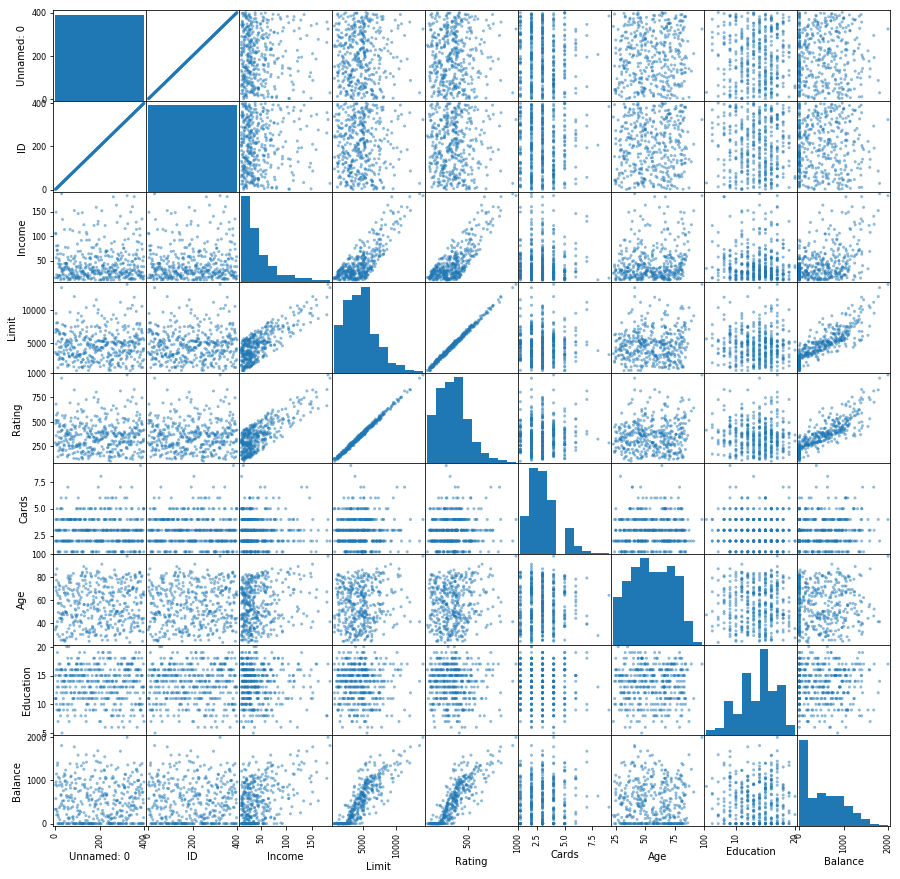

In [46]:
pd.plotting.scatter_matrix(data, figsize = [15,15])

#### Explore various encoding methodologies for categorical variables. (One-Hot and Binary encoding).

In [59]:
balance = data['Balance']

In [66]:
data = data.drop(columns = ['Balance'], axis = 1)

In [49]:
X = data.select_dtypes(include = [object])
le = LabelEncoder()
X_2 = X.apply(le.fit_transform)
enc = OneHotEncoder()
enc.fit(X_2)
onehotlabels = enc.transform(X_2).toarray()
onehotlabels.shape

,Gender,Student,Married,Ethnicity
0,Male,No,Yes,Caucasian
1,Female,Yes,Yes,Asian
2,Male,No,No,Asian
3,Female,No,No,Asian
4,Male,No,Yes,Caucasian


In [68]:
data['Gender'] = X_2['Gender']
data['Student'] = X_2['Student']
data['Married'] = X_2['Married']
data['Ethnicity'] = X_2['Ethnicity']

In [69]:
data.head()

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity
0,1,1,14.891,3606,283,2,34,11,1,0,1,2
1,2,2,106.025,6645,483,3,82,15,0,1,1,1
2,3,3,104.593,7075,514,4,71,11,1,0,0,1
3,4,4,148.924,9504,681,3,36,11,0,0,0,1
4,5,5,55.882,4897,357,2,68,16,1,0,1,2


In [72]:
data.shape

(400, 12)

In [70]:
data2 = pd.DataFrame(pd.np.column_stack([data, onehotlabels]))

In [71]:
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,1.0,14.891,3606.0,283.0,2.0,34.0,11.0,1.0,0.0,...,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,2.0,2.0,106.025,6645.0,483.0,3.0,82.0,15.0,0.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,3.0,104.593,7075.0,514.0,4.0,71.0,11.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4.0,4.0,148.924,9504.0,681.0,3.0,36.0,11.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,5.0,5.0,55.882,4897.0,357.0,2.0,68.0,16.0,1.0,0.0,...,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [73]:
data2['Balance'] = balance

In [74]:
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,Balance
0,1.0,1.0,14.891,3606.0,283.0,2.0,34.0,11.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,333
1,2.0,2.0,106.025,6645.0,483.0,3.0,82.0,15.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,903
2,3.0,3.0,104.593,7075.0,514.0,4.0,71.0,11.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,580
3,4.0,4.0,148.924,9504.0,681.0,3.0,36.0,11.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,964
4,5.0,5.0,55.882,4897.0,357.0,2.0,68.0,16.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,331


#### Center and standardize the data.
- Why is centering (zero mean) and standardizing (unit variance) of data necessary? 
- Are the ridge regression and standard least squares coefficient estimates scale invariant? Here scale invariance implies that multiplying a predictor by a constant $c$   leads to scaling of coefficient estimates by a factor of 1/ $c$ . 

In [98]:
std_scalar = preprocessing.StandardScaler()
data2_scaled = std_scalar.fit_transform(data2)

#### Split dataset into training and validation set (80:20)

In [99]:
train, validation = train_test_split(data2_scaled, test_size = 0.2)

In [100]:
xtrain = train[:,:-1]
ytrain = train[:,-1]
xvalid = validation[:,:-1]
yvalid = validation[:,-1]

#### Use linear regression. 
- Report training and validation error. 

In [101]:
linear_model = LinearRegression()
linear_model.fit(xtrain, ytrain)
print('Training error: ', mean_squared_error(linear_model.predict(xtrain), ytrain))
print('Validation error: ', mean_squared_error(linear_model.predict(xvalid), yvalid))

Training error:  0.04415750609378337
Validation error:  0.04869017021012358


#### Use ridge regression for different values of the penalty coefficient $\lambda$
- Plot training and validation error vs $\lambda$. Compare with least squares regression on the same graph.
- Plot all coefficients of the model vs $\lambda$ on the same graph.
- Use k-fold cross validation / grid search to find optimal value for the hyperparameter $\lambda$. (You can use scikit-learn)

In [148]:
alphas = np.logspace(-3,3,1000)

In [158]:
coefficients = []
training_error = []
validation_error = []
valid_err = 999999
for alpha_val in alphas:
    model = Ridge(alpha = alpha_val)
    model.fit(xtrain, ytrain)
    train_pred = model.predict(xtrain)
    training_error.append(mean_squared_error(train_pred, ytrain))
    validation_pred = model.predict(xvalid)
    validation_error.append(mean_squared_error(validation_pred, yvalid))
    coefficients.append(model.coef_)
    if mean_squared_error(validation_pred, yvalid) < valid_err:
        optimum_lambda_ridge = alpha_val
        valid_err = mean_squared_error(validation_pred, yvalid)
        coefficients_opt = model.coef_
        opt_validation_error = mean_squared_error(validation_pred, yvalid)

In [150]:
optimum_lambda_ridge

1.1092898648952227

In [152]:
coefficients_opt

array([ 6.50060746e-03,  6.50060746e-03, -5.83038721e-01,  8.12731350e-01,
        5.18580780e-01,  5.57388437e-02, -2.34588265e-02, -2.64832809e-03,
        4.95725362e-04,  9.39714536e-02, -4.74411665e-03,  3.79887760e-03,
       -4.95725362e-04,  4.95725362e-04, -9.39714536e-02,  9.39714536e-02,
        4.74411665e-03, -4.74411665e-03, -7.97572620e-03,  8.59359688e-03,
       -6.07235221e-04])

In [159]:
opt_validation_error

0.04806751022082416

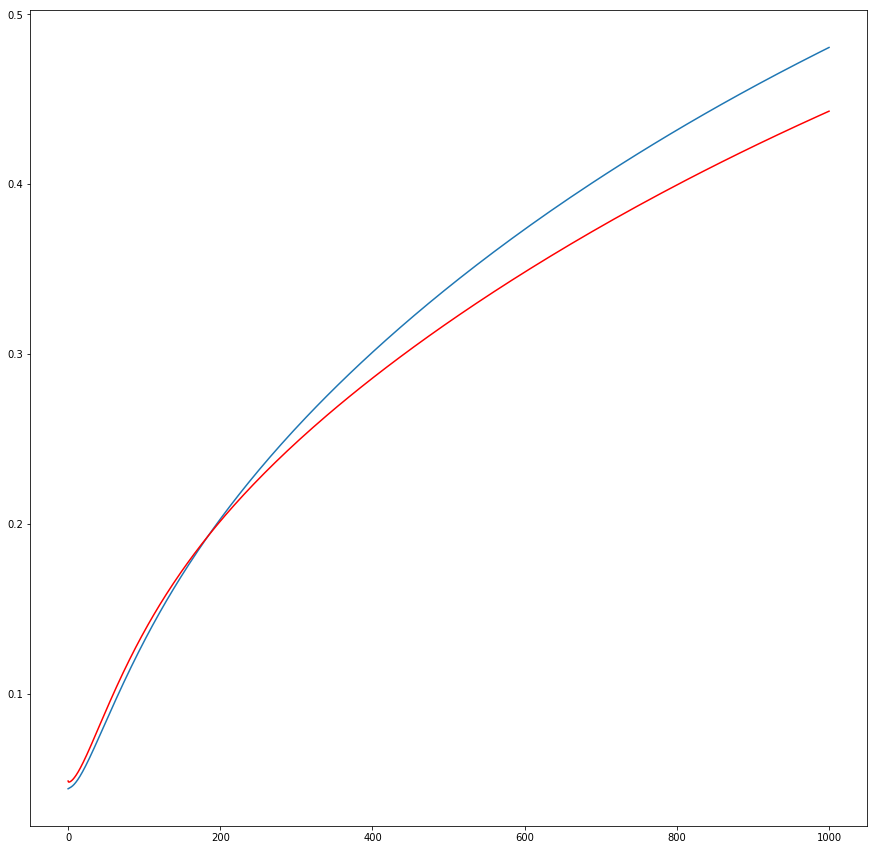

In [130]:
plt.plot(alphas, training_error)
plt.plot(alphas, validation_error, 'r')

In [131]:
coefficients = np.array(coefficients)

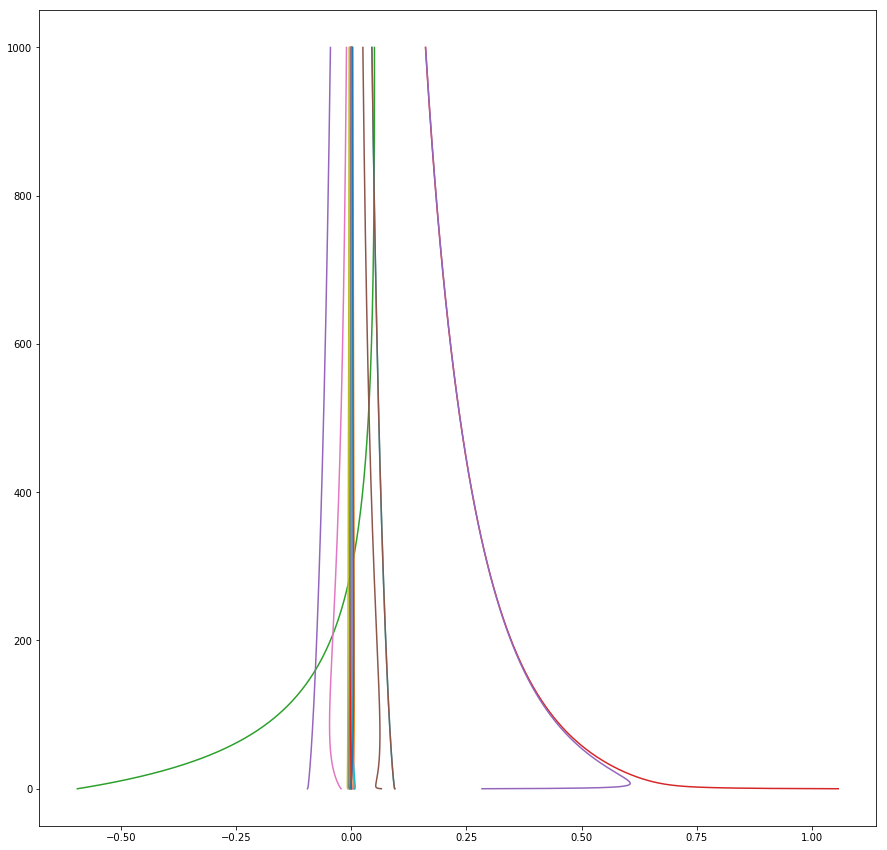

In [132]:
for i in range(coefficients.shape[1]):
    plt.plot(coefficients[:,i], alphas)

####   Use lasso regression for different values of the penalty coefficient $\lambda$
- Plot training and validation error vs $\lambda$. Compare with least squares regression on the same graph.
- Plot all coefficients of the model vs $\lambda$ on the same graph.
- Use k-fold cross validation / grid search to find optimal value for the hyperparameter $\lambda$. (You can use scikit-learn)

In [165]:
coefficients = []
training_error = []
validation_error = []
valid_err = 99999999
for alpha_val in alphas:
    model = Lasso(alpha = alpha_val)
    model.fit(xtrain, ytrain)
    train_pred = model.predict(xtrain)
    training_error.append(mean_squared_error(train_pred, ytrain))
    validation_pred = model.predict(xvalid)
    validation_error.append(mean_squared_error(validation_pred, yvalid))
    coefficients.append(model.coef_)
    if mean_squared_error(validation_pred, yvalid) < valid_err:
        optimum_lambda_lasso = alpha_val
        valid_err = mean_squared_error(validation_pred, yvalid)
        coefficients_opt_lasso = model.coef_
        opt_validation_error = mean_squared_error(validation_pred, yvalid)

In [166]:
optimum_lambda_lasso

0.0065586856595714355

In [167]:
coefficients_opt_lasso

array([ 5.22003172e-03,  0.00000000e+00, -5.63048400e-01,  1.01389881e+00,
        2.96407268e-01,  5.97041800e-02, -1.82365825e-02, -0.00000000e+00,
        0.00000000e+00,  2.76881304e-01, -4.63802014e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -1.29770940e-04,  0.00000000e+00,
        1.26301507e-05, -0.00000000e+00, -6.66084112e-03,  0.00000000e+00,
        0.00000000e+00])

In [157]:
opt_validation_error

0.048586282682378155

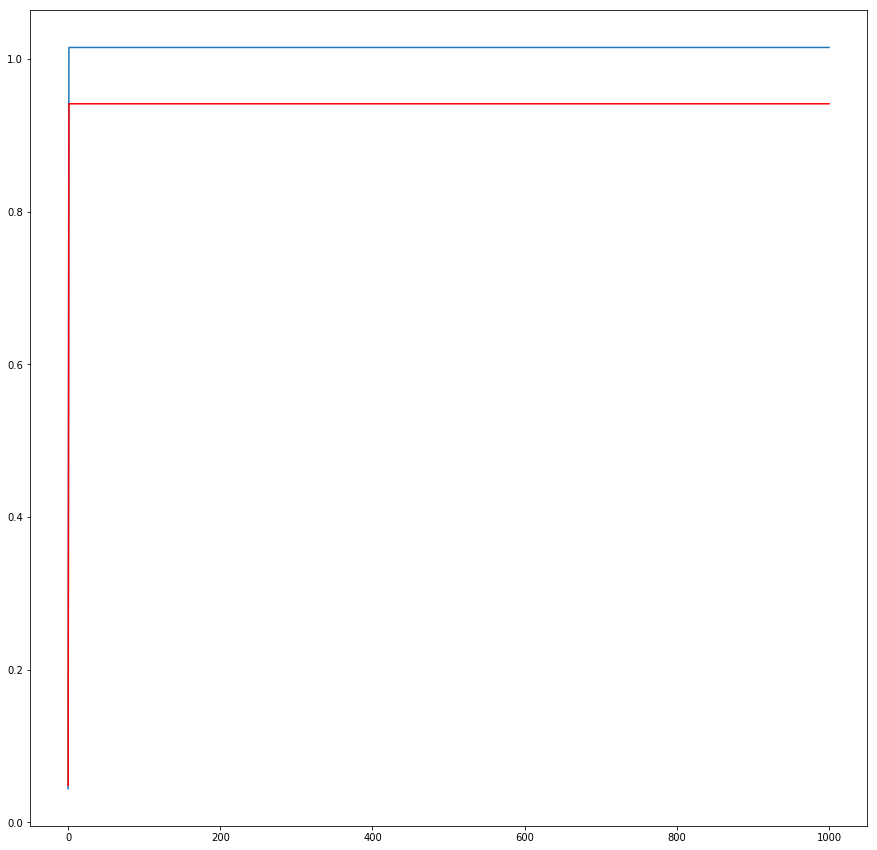

In [120]:
plt.plot(alphas, training_error)
plt.plot(alphas, validation_error, 'r')

In [121]:
coefficients = np.array(coefficients)

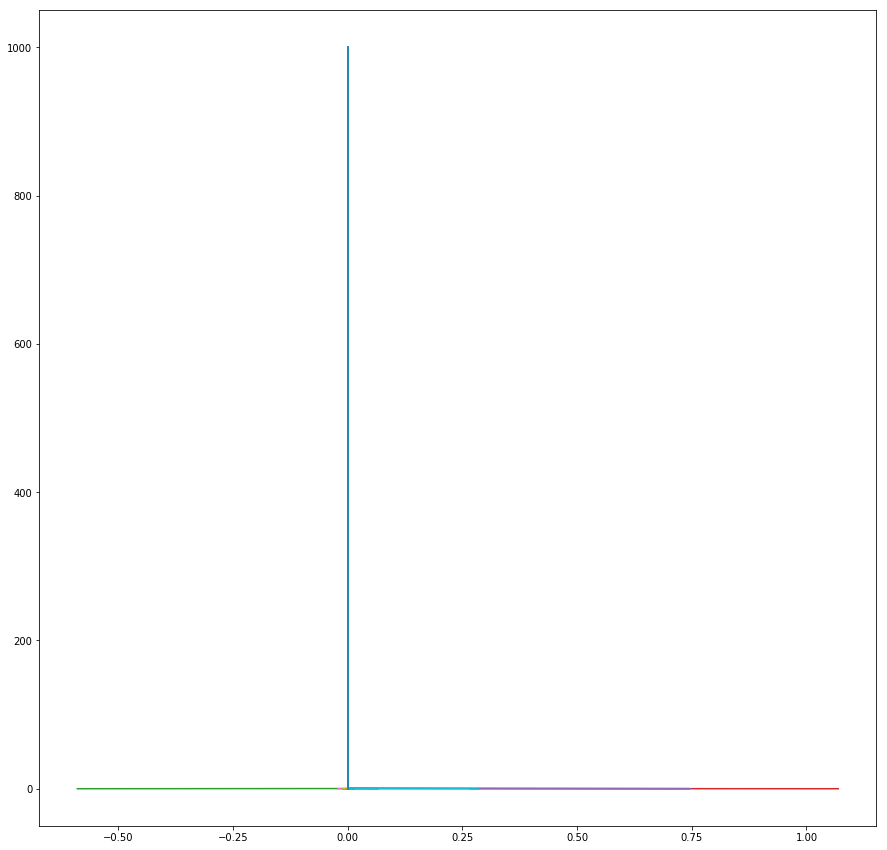

In [122]:
for i in range(coefficients.shape[1]):
    plt.plot(coefficients[:,i], alphas)

#### Observations and Inferences:
- Observe and explain the difference in the behaviour of lasso and ridge coefficients as $\lambda$ increases.
- Briefly explain which of Lasso and Ridge regression would perform better in terms of validation error and the interpretability of developed models in the the following cases:
    - The output response is related to almost all predictors.
    - The output response is only related to let's say, 6 out of 40 predictors.
- List out the features selected by Lasso regression for the optimal value of $\lambda$.

- As lambda increases both Ridge and Lasso models training and test error increases as the model complexity decreases, it starts underfitting.
- There is sharp change in the error for Lasso and error rate changes gradually for Ridge.
- None of the coefficients of Ridge model are zero but the lasso shrinks coefficients to complete zero ( correlated features ).
- Since all the features depend of the output Ridge would perform better in terms of validation error as none of the features will be correlated. From the previous exercise we saw that in the presence of uncorrelated features ridge model performed better than Lasso in predicting the estimates.
- When the output is only related to some features Lasso will perform better as it will shrink the features which are correlated and independent to the output response.
- Lasso shrinks the coefficients of correlated features to zero retaining only one variable, 

In [160]:
data.columns

Index(['Unnamed: 0', 'ID', 'Income', 'Limit', 'Rating', 'Cards', 'Age',
       'Education', 'Gender', 'Student', 'Married', 'Ethnicity'],
      dtype='object')

In [168]:
coefficients_opt_lasso

array([ 5.22003172e-03,  0.00000000e+00, -5.63048400e-01,  1.01389881e+00,
        2.96407268e-01,  5.97041800e-02, -1.82365825e-02, -0.00000000e+00,
        0.00000000e+00,  2.76881304e-01, -4.63802014e-03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -1.29770940e-04,  0.00000000e+00,
        1.26301507e-05, -0.00000000e+00, -6.66084112e-03,  0.00000000e+00,
        0.00000000e+00])

- Unnamed: 0, Income, limit, rating, cards, age,student, marriage, onehot_enc column gender, onehot_enc column of student, one hot enc column of ethnicity

#### Bonus (Optional) : 
- Try out Best Subset Selection, Forward Stepwise Selection, Backward Stepwise Selection and Recursive Feature Elimination for feature selection. Compare the selected features, validation error and computational complexity for the above with Lasso/Ridge regression.
- Use elastic net regression and compare validation error with ridge and lasso regession.